## Урок 5. Проверка статистических гипотез. P-значения. Доверительные интервалы. A/B-тестирование

1.    Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением, равным 16. Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 80, а объем выборки n = 256.

2.    В результате 10 независимых измерений некоторой величины X, выполненных с одинаковой точностью, получены опытные данные: 6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1 <br>Предполагая, что результаты измерений подчинены нормальному закону распределения вероятностей, оценить истинное значение величины X при помощи доверительного интервала, покрывающего это значение с доверительной вероятностью 0,95.

3.    Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

4.    Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190.<br>Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%?



##  1.

In [1]:
from scipy import stats as s

std = 16
p = 0.95
mean = 80
n = 256
# дано среднее ген.совокупности, поэтому используем s.norm
dev = s.norm.ppf(1-0.05/2) # результат: количество стандартных отклонений,
                          # на которые отклоняется величина, если вероятность ее появления меньше заданного уровня
mse = std / ((n-1)**0.5) # результат: стандартная ошибка среднего mse
print(f'''
{mean-mse*dev} - левая граница,
{mean+mse*dev} - правая граница ДИ''')


78.03619670916636 - левая граница,
81.96380329083364 - правая граница ДИ


## 2.

### 2.1 - оценка ДИ для среднего

In [2]:
data = [6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1]
p = 0.95
n = len(data)
mean = sum(data)/n
alpha = (1-p)/2 # 1-p = уровень alpha; т.к. критерий двусторонний, делим этот уровень на 2
std = (sum([(i-mean)**2 for i in data])/(n-1))**0.5
# среднее ген.совокупности неизвестно, поэтому используем s.t
dev = s.t.ppf(1-alpha,df=n-1)
mse = std / (n**0.5)
print(f'''
{mean-mse*dev} - левая граница,
{mean+mse*dev} - правая граница ДИ''')


6.267515851415712 - левая граница,
6.912484148584286 - правая граница ДИ


### 2.2 - оценка ДИ для значений

In [3]:
s.t.ppf([alpha,1-alpha],loc=mean, scale=std, df = n-1)

array([5.57021558, 7.60978442])

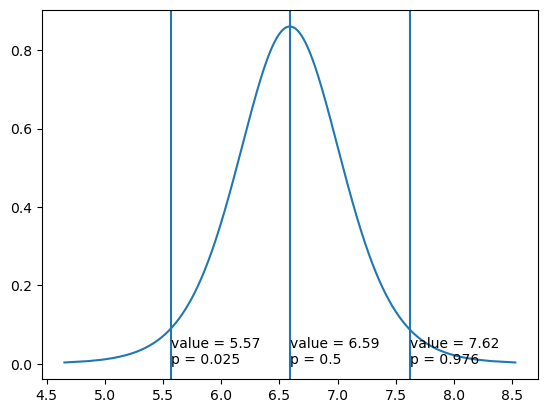

In [4]:
from matplotlib import pyplot as plt
import numpy as np
points = s.t.ppf(np.linspace(0,1,1000),loc=mean, scale=std, df = n-1)[1:-1]
cum_vars = s.t.cdf(points,loc=mean, scale=std, df = n-1)
res = np.array(list(zip(cum_vars,points)))
max_value = res[np.argwhere(res[:,0]>=0.5)[0]][0][1]
maximum = res[np.argwhere(res[:,0]>=0.5)[0]][0][0]
left_value = res[np.argwhere(res[:,0]>=0.025)[0]][0][1]
left_var = res[np.argwhere(res[:,0]>=0.025)[0]][0][0]
right_value = res[np.argwhere(res[:,0]>=0.975)[0]][0][1]
right_var = res[np.argwhere(res[:,0]>=0.975)[0]][0][0]


### Подписи к данным
values = [max_value,left_value,right_value]
y = [0,0,0]
texts = ['value = ' + str(round(max_value,2))+'\np = '+str(round(maximum,2)),
        'value = ' + str(round(left_value,2))+'\np = '+str(round(left_var,4)),
        'value = ' + str(round(right_value,2))+'\np = '+str(round(right_var,4))]

### График
plt.plot(points,s.t.pdf(points,loc=mean, scale=std, df = n-1))
plt.axvline(max_value)
plt.axvline(left_value)
plt.axvline(right_value)
for i in zip(values,y,texts):
    plt.text(*i)
plt.show()

## 3.

In [5]:
mean = 17
alpha = 0.05
n = 100
test = 17.5
var = 4
std = var**0.5
mse = std / (n**0.5)
# Дисперсия известна для ген.совокупности - используем s.norm
t = s.norm.ppf(1-alpha)
print(mean + mse*t,'=> Среднее не попадает в доверительный интервал')
z = (test - mean)/(std / (n**0.5))
print(f'Значение критерия = {z}')

print(f'''-t = {-t},\nz = {z},\nt = {t}''')

17.328970725390295 => Среднее не попадает в доверительный интервал
Значение критерия = 2.5
-t = -1.6448536269514722,
z = 2.5,
t = 1.6448536269514722


т.к. найденное значение критерия превысило критическое значение и попало в область критических значений, нулевую гипотезу отвергаем (средний размер шариков не равен 17)

## 4.

In [6]:
mean = 200
data = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]
n = len(data)
test_mean = sum(data)/len(data)
std = (sum([(i-test_mean)**2 for i in data])/(n-1))**0.5
alpha = 0.01
mse = std / (n**0.5)
t = s.t.ppf(1-alpha/2,df = n-1)
z = (test_mean - mean) / (std/ ((n-1)**0.5))
print(f'-t, z, t = {-t}, {z}, {t}')
test_mean - mse*t, test_mean, test_mean + mse*t

-t, z, t = -3.2498355440153697, -1.0104496045629119, 3.2498355440153697


(193.92322840036354, 198.5, 203.07677159963646)

т.к. найденное значение критерия находится между двумя (левым и правым) критическими значениями, и не попало в область критических значений, нулевую гипотезу принимаем (средний размер пачки может быть равен 200)